## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory, split_dataset
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1nEbstO4GcnwKGOc8YADXW6PcfHseDnVf
!gdown --id 1J30rDoxiaFFpTMbUykY0zgtRhL8frH9l
!unzip /content/numbersData.zip
!unzip /content/signsData.zip

Streaming output truncated to the last 5000 lines.
  inflating: mathData_train/_/exp38884.jpg  
  inflating: mathData_train/_/exp38898.jpg  
  inflating: mathData_train/_/exp3890.jpg  
  inflating: mathData_train/_/exp3893.jpg  
  inflating: mathData_train/_/exp38939.jpg  
  inflating: mathData_train/_/exp38943.jpg  
  inflating: mathData_train/_/exp38992.jpg  
  inflating: mathData_train/_/exp39005.jpg  
  inflating: mathData_train/_/exp39073.jpg  
  inflating: mathData_train/_/exp39086.jpg  
  inflating: mathData_train/_/exp3924.jpg  
  inflating: mathData_train/_/exp3927.jpg  
  inflating: mathData_train/_/exp39344.jpg  
  inflating: mathData_train/_/exp39400.jpg  
  inflating: mathData_train/_/exp3941.jpg  
  inflating: mathData_train/_/exp39412.jpg  
  inflating: mathData_train/_/exp39416.jpg  
  inflating: mathData_train/_/exp39532.jpg  
  inflating: mathData_train/_/exp39534.jpg  
  inflating: mathData_train/_/exp39536.jpg  
  inflating: mathData_train/_/exp39540.jpg  
  inflati

## Load Dataset

In [3]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.2,
    height_shift_range=0.2)
train_ds = train_datagen.flow_from_directory(
    directory='/content/mathData_train/',
    color_mode='grayscale',
    batch_size=256,
    target_size=(28, 28),
    shuffle=True,
)

Found 358566 images belonging to 17 classes.


In [4]:
test_datagen=ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.2,
    height_shift_range=0.2)
test_ds = train_datagen.flow_from_directory(
    directory='/content/mathData_test/',
    color_mode='grayscale',
    batch_size=256,
    target_size=(28, 28),
    shuffle=True,
)

Found 139186 images belonging to 17 classes.


## Data preprocessing

### Feature scaling

## Models

### Base Model

#### Build the network layers

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))

#### Build the Optimizer

In [6]:
from keras.optimizers import Adam

opt = keras.optimizers.Adam(learning_rate=0.00015)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

#### Training


In [7]:
tf.config.run_functions_eagerly(True)
model_history = model.fit(train_ds, validation_data=test_ds, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
1401/1401 [==============================] - 378s 263ms/step - loss: 1.4010 - accuracy: 0.5705 - val_loss: 0.4794 - val_accuracy: 0.8600
Epoch 2/10
1401/1401 [==============================] - 357s 255ms/step - loss: 0.4748 - accuracy: 0.8612 - val_loss: 0.3069 - val_accuracy: 0.9123
Epoch 3/10
1401/1401 [==============================] - 357s 255ms/step - loss: 0.3304 - accuracy: 0.9045 - val_loss: 0.2511 - val_accuracy: 0.9306
Epoch 4/10
1401/1401 [==============================] - 357s 255ms/step - loss: 0.2637 - accuracy: 0.9244 - val_loss: 0.2215 - val_accuracy: 0.9408
Epoch 5/10
1401/1401 [==============================] - 360s 257ms/step - loss: 0.2233 - accuracy: 0.9361 - val_loss: 0.1993 - val_accuracy: 0.9483
Epoch 6/10
1401/1401 [==============================] - 360s 257ms/step - loss: 0.1942 - accuracy: 0.9440 - val_loss: 0.1893 - val_accuracy: 0.9530
Epoch 7/10
1401/1401 [==============================] - 359s 257ms/step - loss: 0.1775 - accuracy: 0.9489 - val_

#### Loss and Accuracy Visualization

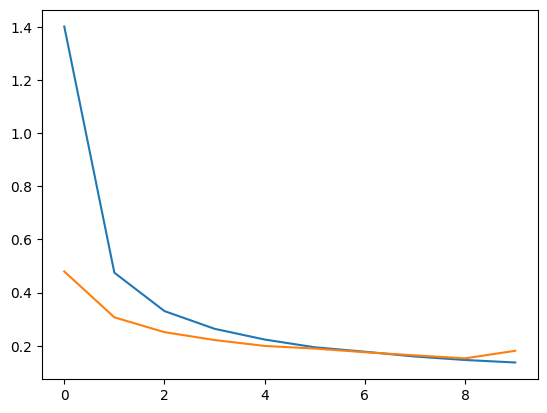

In [8]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

Show  on plot the accuracy during training

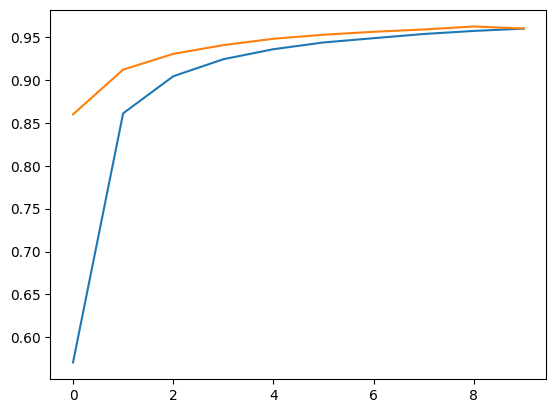

In [9]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

#### Model save

In [10]:
!mkdir -p saved_model
model.save('math_model.h5')

# Test area

In [11]:
!rm -r segmented/*

rm: cannot remove 'segmented/*': No such file or directory


In [12]:
!gdown --id 1FzBlaFYoaYCSLlnlb5jg1Gt8ahG8KZ0S
!unzip segmented.zip -d ./

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FzBlaFYoaYCSLlnlb5jg1Gt8ahG8KZ0S
To: /content/segmented.zip
100% 37.6k/37.6k [00:00<00:00, 118MB/s]
Archive:  segmented.zip
   creating: ./segmented/
  inflating: ./segmented/%.jpg       
  inflating: ./segmented/+.jpg       
  inflating: ./segmented/-.jpg       
  inflating: ./segmented/0.jpg       
  inflating: ./segmented/1.jpg       
  inflating: ./segmented/1_hw.jpg    
  inflating: ./segmented/2.jpg       
  inflating: ./segmented/3.jpg       
  inflating: ./segmented/4.jpg       
  inflating: ./segmented/5.jpg       
  inflating: ./segmented/6.jpg       
  inflating: ./segmented/6_hw.jpg    
  inflating: ./segmented/7.jpg       
  inflating: ./segmented/8.jpg       
  inflating: ./segmented/9.jpg       
  inflating

In [13]:
from PIL import Image,ImageOps
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import os

In [14]:
SEGMENTED_OUTPUT_DIR = "./segmented/"

In [15]:
segmented_images = []
files = os.listdir(SEGMENTED_OUTPUT_DIR)
for f in files:
    img = Image.open(SEGMENTED_OUTPUT_DIR + f).convert('L')
    img = img.resize((28,28))
    im = np.asarray(img)
    im = np.reshape(im, (28, 28, 1))
    segmented_images.append(im)
segmented_images = np.array(segmented_images)

9.jpg
1_hw.jpg
2.jpg
0.jpg
6_hw.jpg
4.jpg
7.jpg
8.jpg
r.jpg
1.jpg
l.jpg
=.jpg
6.jpg
5.jpg
X.jpg
+.jpg
3.jpg
%.jpg
-.jpg


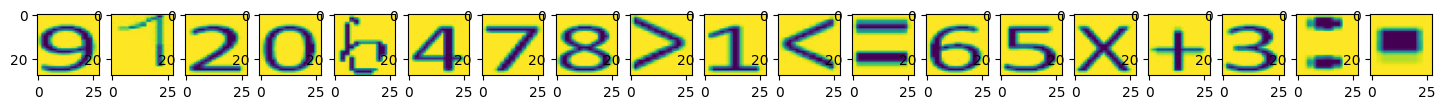

In [16]:
figure(figsize=(18,18))

size = len(segmented_images)
for i in range(size):
    img = segmented_images[i]
    plt.subplot(2, size, i + 1)
    plt.imshow(img)
    print(files[i])

In [17]:
print(segmented_images.shape)

(19, 28, 28, 1)


In [18]:
labels = ['/', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'X', '<', '>']

In [19]:
y_pred = model.predict(segmented_images)

for i in range(size):
  print(labels[np.argmax(y_pred[i])] + " - " + files[i])

1/1 [==============================] - 0s 180ms/step
9 - 9.jpg
1 - 1_hw.jpg
2 - 2.jpg
0 - 0.jpg
6 - 6_hw.jpg
4 - 4.jpg
7 - 7.jpg
8 - 8.jpg
> - r.jpg
1 - 1.jpg
< - l.jpg
= - =.jpg
6 - 6.jpg
5 - 5.jpg
X - X.jpg
+ - +.jpg
3 - 3.jpg
/ - %.jpg
- - -.jpg
